***第5章: 係り受け解析***
>日本語Wikipediaの「人工知能」に関する記事からテキスト部分を抜き出したファイルがai.ja.zipに収録されている． 
この文章をCaboChaやKNP等のツールを利用して係り受け解析を行い，その結果をai.ja.txt.parsedというファイルに保存せよ．
このファイルを読み込み，以下の問に対応するプログラムを実装せよ．

In [2]:
#-o:output layer
! cabocha -f1 /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt -o /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed
! head -n 20 /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed

/bin/sh: cabocha: command not found
* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
EOS
EOS
* 0 17D 1/1 0.388993
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
* 1 17D 2/3 0.613549
（	記号,括弧開,*,*,*,*,（,（,（
じん	名詞,一般,*,*,*,*,じん,ジン,ジン
こうち	名詞,一般,*,*,*,*,こうち,コウチ,コーチ
のう	助詞,終助詞,*,*,*,*,のう,ノウ,ノー
、	記号,読点,*,*,*,*,、,、,、
、	記号,読点,*,*,*,*,、,、,、
* 2 3D 0/0 0.758984
AI	名詞,一般,*,*,*,*,*
* 3 17D 1/5 0.517898
〈	記号,括弧開,*,*,*,*,〈,〈,〈
エーアイ	名詞,固有名詞,一般,*,*,*,*


*出力結果：* 文節番号 係り先の文節番号　主事の形態素番号/昨日後の形態素番号　係り関係のスコア  
　　　　　表層形\t品詞,品詞細分類１~3,活用形,活用型,原形,読み,発音*

→段落区切り


***40. 係り受け解析結果の読み込み（形態素）***
>形態素を表すクラスMorphを実装せよ．このクラスは表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をメンバ変数に持つこととする．さらに，係り受け解析の結果（ai.ja.txt.parsed）を読み込み，各文をMorphオブジェクトのリストとして表現し，冒頭の説明文の形態素列を表示せよ．

In [3]:
import re

class Morph:
    
    def __init__(self,line):
        #self.インスタンス変数 = 値　でアクセス
        #メンバ変数とはクラス内に保持する変数のこと
        #解析結果の1行分の情報を渡すと、Morphクラスのインスタンスを返すようにしたい
        self.surface = line[0]
        self.base = line[7]
        self.pos =  line[1]
        self.pos1 = line[2]
    
def analyze_ai_ja(fname):
    with open(fname) as f:
        sentences = []
        morph_list = []
        
        for line in f:
            line = line.rstrip("\n")
            line = re.split(r"[\t, ]",line)
            
            
            #係り関係に関する情報が書いてある行は何もしない
            num_of_elements_in_dependency_info = 5
            if line[0] == "*" and len(line) == num_of_elements_in_dependency_info:
                continue
            
            elif line[0] != "EOS":
                morph_list.append(Morph(line))
            
            else:
                sentences.append(morph_list)
                morph_list = []
                
    return sentences

result = analyze_ai_ja("/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed")
#テキスト全体の解析結果のリスト
whole_sentences = list(result)

#冒頭の説明文を表示
first_sentence = whole_sentences[2]
for morph in first_sentence:
    print("surface:{}\t base:{}\t pos:{}\t pos1:{}".format(morph.surface,morph.base,morph.pos,morph.pos1))
                
    

surface:人工	 base:人工	 pos:名詞	 pos1:一般
surface:知能	 base:知能	 pos:名詞	 pos1:一般
surface:（	 base:（	 pos:記号	 pos1:括弧開
surface:じん	 base:じん	 pos:名詞	 pos1:一般
surface:こうち	 base:こうち	 pos:名詞	 pos1:一般
surface:のう	 base:のう	 pos:助詞	 pos1:終助詞
surface:、	 base:、	 pos:記号	 pos1:読点
surface:、	 base:、	 pos:記号	 pos1:読点
surface:AI	 base:*	 pos:名詞	 pos1:一般
surface:〈	 base:〈	 pos:記号	 pos1:括弧開
surface:エーアイ	 base:*	 pos:名詞	 pos1:固有名詞
surface:〉	 base:〉	 pos:記号	 pos1:括弧閉
surface:）	 base:）	 pos:記号	 pos1:括弧閉
surface:と	 base:と	 pos:助詞	 pos1:格助詞
surface:は	 base:は	 pos:助詞	 pos1:係助詞
surface:、	 base:、	 pos:記号	 pos1:読点
surface:「	 base:「	 pos:記号	 pos1:括弧開
surface:『	 base:『	 pos:記号	 pos1:括弧開
surface:計算	 base:計算	 pos:名詞	 pos1:サ変接続
surface:（	 base:（	 pos:記号	 pos1:括弧開
surface:）	 base:）	 pos:記号	 pos1:括弧閉
surface:』	 base:』	 pos:記号	 pos1:括弧閉
surface:という	 base:という	 pos:助詞	 pos1:格助詞
surface:概念	 base:概念	 pos:名詞	 pos1:一般
surface:と	 base:と	 pos:助詞	 pos1:並立助詞
surface:『	 base:『	 pos:記号	 pos1:括弧開
surface:コンピュータ	 base:コンピュータ	 pos:名詞	 pos1:一般
s

**41. 係り受け解析結果の読み込み（文節・係り受け）**
>40に加えて，文節を表すクラスChunkを実装せよ．このクラスは形態素（Morphオブジェクト）のリスト（morphs），係り先文節インデックス番号（dst），係り元文節インデックス番号のリスト（srcs）をメンバ変数に持つこととする．さらに，入力テキストの係り受け解析結果を読み込み，１文をChunkオブジェクトのリストとして表現し，冒頭の説明文の文節の文字列と係り先を表示せよ．本章の残りの問題では，ここで作ったプログラムを活用せよ．

In [29]:
class Chunk:

    def __init__(self,line):
        self.morphs = []
        self.dst = int(line[2].rstrip("D"))
        self.srcs = []
        
    #文節の表層系を結合する関数
    def join_surfaces(self):
        return "".join([morph.surface for morph in self.morphs])
    
    #記号以外の文節の表層系を結合する関数
    def join_surfaces_without_marks(self):
        return "".join([morph.surface for morph in self.morphs if morph.pos != "記号"])
    
    #名詞を見つける関数を追加
    def has_noun(self):
        return any([m.pos == "名詞" for m in self.morphs])

    #形態素名がmorph_nameであるもの表層形を返す関数を追加
    def get_surface(self,morph_name):
        return [m.surface for m in self.morphs if m.pos == morph_name]
    
def analyze_chunks(fname):
    with open(fname) as f:
        block = []
        chunks_list = []
        
        for line in f:
            line = line.rstrip()
            line = re.split(r"[\t, ]",line)
            
            #係り受け解析結果の行の時、係り元文節インデックス番号をchunk_listに追加
            #マジックナンバー回避
            num_of_elements_in_dependency_info = 5
            if line[0] == "*" and len(line) == num_of_elements_in_dependency_info:
                chunk = Chunk(line)
                chunks_list.append(chunk)
                
            
                
            
            #EOSの行の時、chunk_listのインデックス番号と、srcsのインデックス番号を紐付ける
            elif line[0] == "EOS":
                for i , chunk in enumerate(chunks_list):
                    if chunk.dst != -1:
                        chunks_list[chunk.dst].srcs.append(i)
                        
                block.append(chunks_list)
                chunks_list = []
                
            #形態素解析結果の行の時、MorphオブジェクトをChunkのオブジェクトに追加
            else:
                morph = Morph(line)
                chunk.morphs.append(morph)
            
    return block
    
                                               
fname = "/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed"
first_block = analyze_chunks(fname)[2]

for chunk in first_block:
    print("{}\t{}".format(chunk.join_surfaces() , chunk.dst)) 

人工知能	17
（じんこうちのう、、	17
AI	3
〈エーアイ〉）とは、	17
「『計算	5
（）』という	9
概念と	9
『コンピュータ	8
（）』という	9
道具を	10
用いて	12
『知能』を	12
研究する	13
計算機科学	14
（）の	15
一分野」を	16
指す	17
語。	34
「言語の	20
理解や	20
推論、	21
問題解決などの	22
知的行動を	24
人間に	24
代わって	26
コンピューターに	26
行わせる	27
技術」、または、	34
「計算機	29
（コンピュータ）による	31
知的な	31
情報処理システムの	33
設計や	33
実現に関する	34
研究分野」とも	35
される。	-1


**42. 係り元と係り先の文節の表示**
>係り元の文節と係り先の文節のテキストをタブ区切り形式ですべて抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [5]:
#41のChunkクラスに記号以外の文節の表層系を結合する以下の関数を追加
'''
def join_surfaces_without_marks(self):
    return "".join([morph.surface for morph in self.morphs if morph.pos != "記号"])
'''

first_sentences = analyze_chunks(fname)[2]
for chunk in first_sentences:

    if chunk.dst != -1:
        srcs = chunk.join_surfaces_without_marks()
        dst = first_sentences[chunk.dst].join_surfaces_without_marks()

        print("{}\t{}".format(srcs , dst))

人工知能	語
じんこうちのう	語
AI	エーアイとは
エーアイとは	語
計算	という
という	道具を
概念と	道具を
コンピュータ	という
という	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学
計算機科学	の
の	一分野を
一分野を	指す
指す	語
語	研究分野とも
言語の	推論
理解や	推論
推論	問題解決などの
問題解決などの	知的行動を
知的行動を	代わって
人間に	代わって
代わって	行わせる
コンピューターに	行わせる
行わせる	技術または
技術または	研究分野とも
計算機	コンピュータによる
コンピュータによる	情報処理システムの
知的な	情報処理システムの
情報処理システムの	実現に関する
設計や	実現に関する
実現に関する	研究分野とも
研究分野とも	される


**43. 名詞を含む文節が動詞を含む文節に係るものを抽出**
名詞を含む文節が，動詞を含む文節に係るとき，これらをタブ区切り形式で抽出せよ．ただし，句読点などの記号は出力しないようにせよ．

In [6]:
first_sentences = analyze_chunks(fname)[2]
for chunk in first_sentences:
   
    if any([morph.pos == "名詞" for morph in chunk.morphs]) and any([morph.pos  == "動詞" for morph in first_sentences[chunk.dst].morphs]):
        srcs = chunk.join_surfaces_without_marks()
        dst = first_sentences[chunk.dst].join_surfaces_without_marks()

        print("{}\t{}".format(srcs , dst))

道具を	用いて
知能を	研究する
一分野を	指す
知的行動を	代わって
人間に	代わって
コンピューターに	行わせる
研究分野とも	される


**44. 係り受け木の可視化**
>与えられた文の係り受け木を有向グラフとして可視化せよ．可視化には，Graphviz等を用いるとよい．

In [7]:
from graphviz import Digraph

def draw_digraph(nodes):
    graph = Digraph(format = "png")
    graph.attr("node")
    
    for node in nodes:
        
        graph.node(node[0])　
        graph.node(node[1]) 
        graph.edge(node[0],node[1])
        #(src , dst) →　src -> dst　になる
        
    graph.render("graph_44")
    
fname = "/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed"
first_sentences = analyze_chunks(fname)[2]

nodes = []
for chunk in first_sentences:
    
    if chunk.dst != -1:
        src = chunk.join_surfaces_without_marks()
        dst = first_sentences[chunk.dst].join_surfaces_without_marks()
   
        nodes.append((src , dst))

draw_digraph(nodes)

SyntaxError: invalid character in identifier (<ipython-input-7-949862ca060d>, line 9)

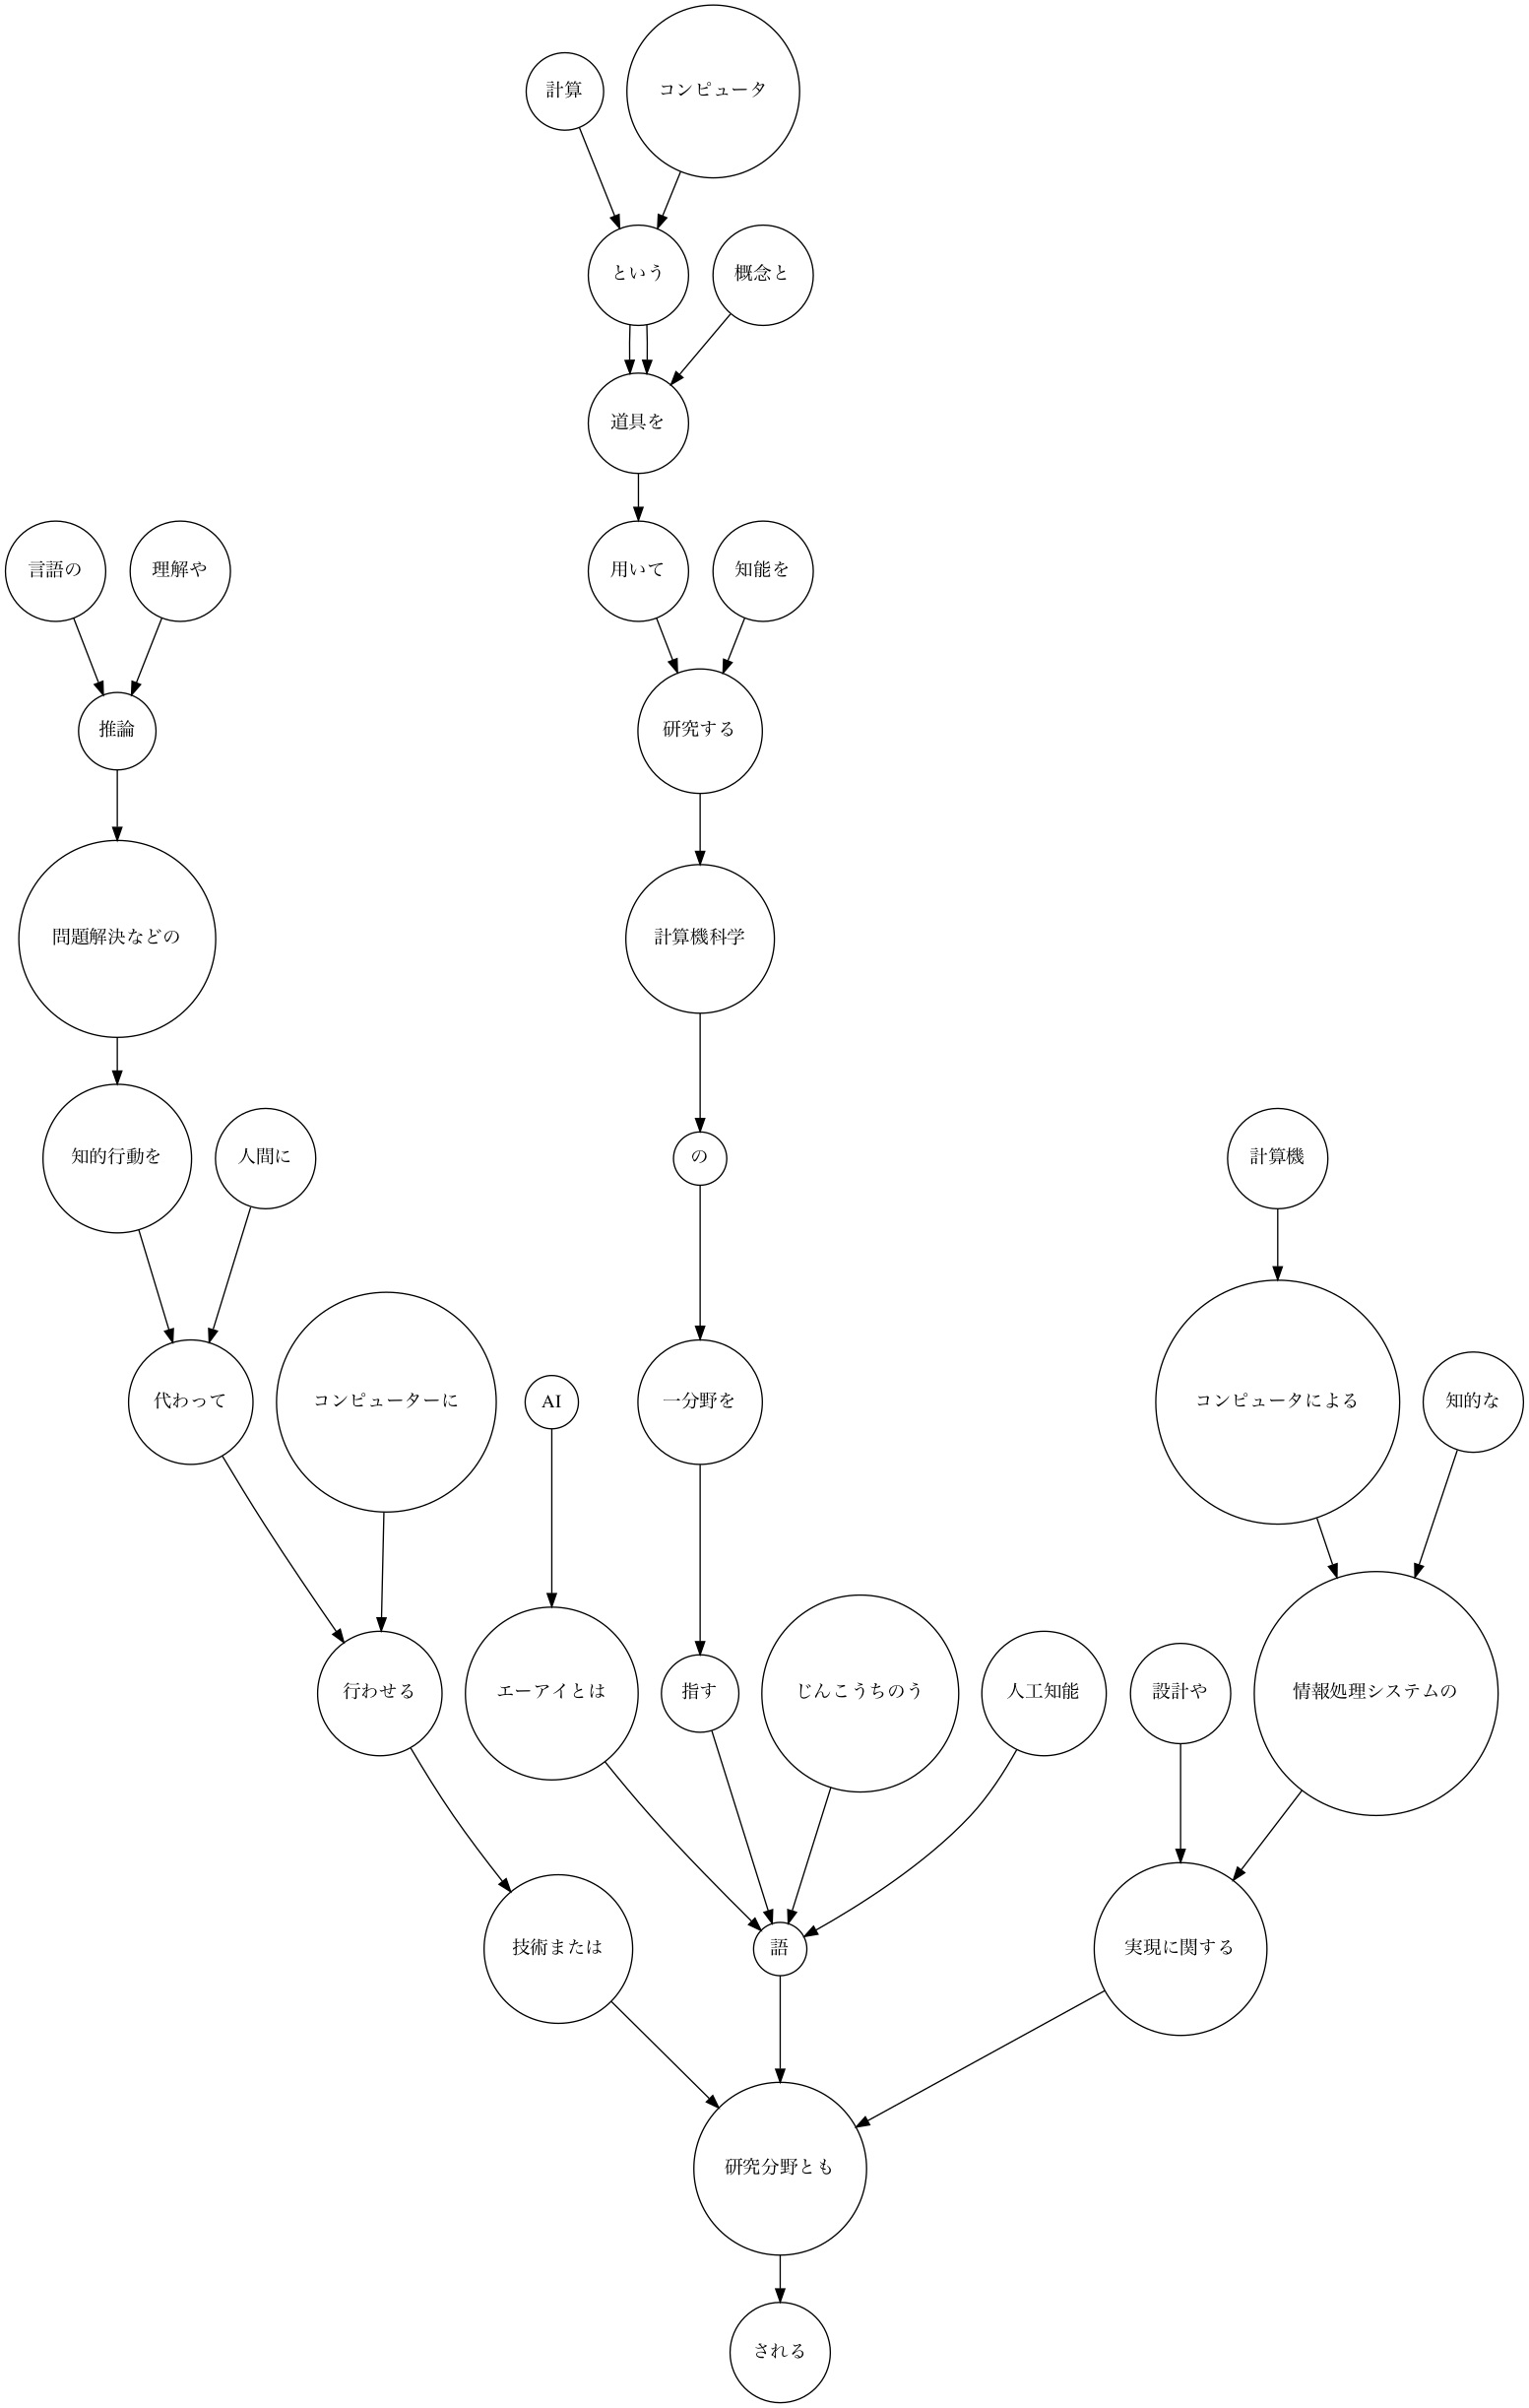

In [8]:
from IPython.display import Image, display_png
display_png(Image("/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/work/graph_44.png"))
#でかい...

**45. 動詞の格パターンの抽出**
>今回用いている文章をコーパスと見なし，日本語の述語が取りうる格を調査したい． 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力せよ． ただし，出力は以下の仕様を満たすようにせよ．
>>・動詞を含む文節において，最左の動詞の基本形を述語とする  
 ・述語に係る助詞を格とする  
 ・述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる  
 「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．
作り出す	で は を  

In [9]:
fname = "/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed"
analyze_ai_ja(fname)
whole_sentences = analyze_chunks(fname)

with open ("ch05_45.txt","w") as f:
    for paragraph in whole_sentences:
        for chunk in paragraph:
             
                #述語 = predicate , 格　= case 
                predicate = ""
                cases = []
               
                #最左の動詞を見つける
                for morph in chunk.morphs:
                    if morph.pos == "動詞":
                        predicate = morph.base
                        
                        
                        for i in chunk.srcs:
                            for morph in paragraph[i].morphs:
                                
                                #係り元の助詞（格）を格納する
                                if morph.pos == "助詞":
                                    cases.append(morph.surface)
                                    
                        #助詞がある場合
                        if cases:
                            f.write("{}\t{}\n".format(predicate , " ".join(sorted(cases))))

In [10]:
! cat /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/ch05_45.txt | sort | uniq -c | sort -nr | head -n 5

  49 する	を
  18 する	が
  15 する	に
  14 する	と
  12 する	は を


>このプログラムの出力をファイルに保存し，以下の事項をUNIXコマンドを用いて確認せよ．
>>コーパス中で頻出する述語と格パターンの組み合わせ
「行う」「なる」「与える」という動詞の格パターン（コーパス中で出現頻度の高い順に並べよ）

In [11]:
!cat /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/ch05_45.txt | grep "行う" | sort | uniq -c | sort -nr | head -n 5

   8 行う	を
   1 行う	まで を
   1 行う	から
   1 行う	に まで を
   1 行う	は を をめぐって


In [12]:
!cat /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/ch05_45.txt | grep "なる" | sort | uniq -c | sort -nr | head -n 5

   3 なる	に は
   3 なる	が と
   2 なる	に
   2 なる	と
   1 無くなる	は


In [13]:
!cat /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/ch05_45.txt | grep "与える" | sort | uniq -c | sort -nr | head -n 5

   1 与える	が など に
   1 与える	に は を
   1 与える	が に


**46. 動詞の格フレーム情報の抽出**
45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力せよ．45の仕様に加えて，以下の仕様を満たすようにせよ．
>・項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）  
・述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる  
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． この文は「作り出す」という１つの動詞を含み，「作り出す」に係る文節は「ジョン・マッカーシーは」，「会議で」，「用語を」であると解析された場合は，次のような出力になるはずである．
>>作り出す	で は を	会議で ジョンマッカーシーは 用語を

In [14]:
#項 (argument):述語(動詞、形容詞など)とともに現われ、述語の意味を補完する役割を果たす要素。述語は一般に主語や目的語を取るが、これらが項に該当する。項は文が成立するために必ず必要とされる。

fname = "/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed"
analyze_ai_ja(fname)
whole_sentences = analyze_chunks(fname)

with open ("ch05_46.txt","w") as f:
    for paragraph in whole_sentences:
        for chunk in paragraph:
             
                predicate = ""
                #格と項を格納するリスト
                case_and_arguments = []
                cases = ""
               
                #最左の動詞を見つける
                for morph in chunk.morphs:
                    if morph.pos == "動詞":
                        predicate = morph.base
                        
                        #係り元の助詞（格）を格納する
                        for i in chunk.srcs:
                            for morph in paragraph[i].morphs:
                            
                                if morph.pos == "助詞":
                                    case = morph.surface
                            
                            #格があるとき、（格,項）のタプルをリストに追加
                            if case:
                                case_and_arguments.append((case , paragraph[i].join_surfaces_without_marks()))

                        if case_and_arguments:
                            case_and_arguments = sorted(case_and_arguments)
                            f.write("{}\t{}\t{}\n".format(predicate , " ".join(case for case,arg in case_and_arguments) , " ".join(arg for case,arg in case_and_arguments)))


In [15]:
! head -n 5 /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/ch05_46.txt 

用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	に を	人間に 知的行動を
行う	て に	代わって コンピューターに


**47. 機能動詞構文のマイニング**   
動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．

>「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる  
述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる  
述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）  
>>例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．  
  学習を行う	に を	元に 経験を

In [20]:
#46で抽出した格パターンのうち、「サ変接続名詞+を+動詞の基本形」となるものを抽出する
fname = "/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed"
analyze_ai_ja(fname)
whole_sentences = analyze_chunks(fname)

with open ("ch05_47.txt","w") as f:
    for paragraph in whole_sentences:
        for chunk in paragraph:
             
                predicate = ""
                #最左の動詞を見つける
                for morph in chunk.morphs:
                    if morph.pos == "動詞":
                        predicate = morph.base
                        break
                        
                if predicate:
                    #格と項を格納するリスト
                    cases_and_args =[]
                    sahen_wo_verb = ""
                    case = ""

                    #動詞の係り元文節の後ろの２形態素について「サ変+を」であるか判定
                    for i in chunk.srcs:
                        before_verb = paragraph[i].morphs[-2:]
                        
                        if len(before_verb) == 2 and before_verb[0].pos1 == "サ変接続" and before_verb[1].surface == "を":
                            sahen_wo_verb = "".join([m.surface for m in before_verb]) + predicate + " "
                            
                    if sahen_wo_verb == "":
                        continue
                        
                    #サ変名詞+を　以外の時を抽出
                    for j in chunk.srcs:
                        srcs_last = paragraph[j].morphs[-1]
                        if len(paragraph[j].morphs) >= 2 and srcs_last.pos == "助詞" and paragraph[j].join_surfaces_without_marks() != "".join([m.surface for m in before_verb]):
                            cases_and_args.append((srcs_last.surface,paragraph[j].join_surfaces_without_marks()))

                    if cases_and_args:
                        cases_and_args.sort(key=lambda x:x[0])
                        f.write("{}\t{}\t{}\n".format(sahen_wo_verb,\
                        " ".join(case for case,arg in cases_and_args),\
                        " ".join(arg for case,arg in cases_and_args)))    

In [33]:
! head -n 5 /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/ch05_47.txt 

head: /Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/ch05_47.txt: No such file or directory


No such file or directoryになってしまうので貼り付け  
結果

行動を代わる 	を	知的行動を  
判断をする 	を	推論判断を   
処理を用いる 	を	記号処理を  
記述をする 	を	記述を  
注目を集める 	が	サポートベクターマシンが

**48. 名詞から根へのパスの抽出**  
文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．  

>各文節は（表層形の）形態素列で表現する
パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する
「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える．CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる． 
>>ジョンマッカーシーは -> 作り出した  
AIに関する -> 最初の -> 会議で -> 作り出した  
最初の -> 会議で -> 作り出した  
会議で -> 作り出した  
人工知能という -> 用語を -> 作り出した  
用語を -> 作り出した  

>KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．   
>>ジョンマッカーシーは -> 作り出した  
ＡＩに -> 関する -> 会議で -> 作り出した  
会議で -> 作り出した    
人工知能と -> いう -> 用語を -> 作り出した  
用語を -> 作り出した  

In [26]:
fname = "/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed"
analyze_ai_ja(fname)
first_paragraph = analyze_chunks(fname)[2]

def get_path(chunk,paragraph):
    #文節が一つの根の場合は文節をリストで返す
    #そうでない場合は文節自身と、その文節の係り先文節から根までのパスをリストで返す
    if chunk.dst == -1:
        return[chunk]
    else:
        return[chunk] + get_path(paragraph[chunk.dst],paragraph)
    
def join_chunks(paragraph):
    return "->".join([chunk.join_surfaces_without_marks() for chunk in paragraph])

for chunk in first_paragraph:
    for m in chunk.morphs:
        if m.pos == "名詞":
            print(join_chunks(get_path(chunk,first_paragraph)))
            break

人工知能->語->研究分野とも->される
じんこうちのう->語->研究分野とも->される
AI->エーアイとは->語->研究分野とも->される
エーアイとは->語->研究分野とも->される
計算->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
概念と->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
コンピュータ->という->道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
道具を->用いて->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
知能を->研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
研究する->計算機科学->の->一分野を->指す->語->研究分野とも->される
計算機科学->の->一分野を->指す->語->研究分野とも->される
一分野を->指す->語->研究分野とも->される
語->研究分野とも->される
言語の->推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
理解や->推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
推論->問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
問題解決などの->知的行動を->代わって->行わせる->技術または->研究分野とも->される
知的行動を->代わって->行わせる->技術または->研究分野とも->される
人間に->代わって->行わせる->技術または->研究分野とも->される
コンピューターに->行わせる->技術または->研究分野とも->される
技術または->研究分野とも->される
計算機->コンピュータによる->情報処理システムの->実現に関する->研究分野とも->される
コンピュータによる->情報処理システムの->実現に関する->研究分野とも->される
知的な->情報処理システムの->実現に関する->研究分野とも->される
情報処理システムの->実現に関する->研究分野とも->される
設計や->実現に関する->研究分野と

**49. 名詞間の係り受けパスの抽出**  
文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．

>問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する  
文節iとjに含まれる名詞句はそれぞれ，XとYに置換する  
また，係り受けパスの形状は，以下の2通りが考えられる．  
>>文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示  
上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示  

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」という例文を考える． 
>CaboChaを係り受け解析に用いた場合，次のような出力が得られると思われる．
>>Xは | Yに関する -> 最初の -> 会議で | 作り出した  
Xは | Yの -> 会議で | 作り出した  
Xは | Yで | 作り出した  
Xは | Yという -> 用語を | 作り出した  
Xは | Yを | 作り出した  
Xに関する -> Yの  
Xに関する -> 最初の -> Yで  
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した  
Xに関する -> 最初の -> 会議で | Yを | 作り出した  
Xの -> Yで  
Xの -> 会議で | Yという -> 用語を | 作り出した  
Xの -> 会議で | Yを | 作り出した  
Xで | Yという -> 用語を | 作り出した  
Xで | Yを | 作り出した  
Xという -> Yを  

>KNPを係り受け解析に用いた場合，次のような出力が得られると思われる．
>>Xは | Yに -> 関する -> 会議で | 作り出した。  
Xは | Yで | 作り出した。  
Xは | Yと -> いう -> 用語を | 作り出した。  
Xは | Yを | 作り出した。  
Xに -> 関する -> Yで  
Xに -> 関する -> 会議で | Yと -> いう -> 用語を | 作り出した。  
Xに -> 関する -> 会議で | Yを | 作り出した。  
Xで | Yと -> いう -> 用語を | 作り出した。  
Xで | Yを | 作り出した。  
Xと -> いう -> Yを  

In [31]:
from itertools import combinations

"""Chunk classに関数を追加

#名詞を見つける関数を追加
def has_noun(self):
    return any([m.pos == "名詞" for m in self.morphs])

#形態素名がmorph_nameであるもの表層形を返す関数を追加
def get_surface(self,morph_name):
    return [m.surface for m in self.morphs if m.pos == morph_name]
"""
   
    
#ある文節から根に到るまでのパスのリストを返す関数
def get_path_to_root(paragraph,chunk):
    dst = chunk.dst
    path = []

    while dst != -1:
        path.append(paragraph[dst])
        dst = paragraph[dst].dst
    return path

#文節を->で結合する関数
def join_chunks_by_arrow(path):
    result = ""
    for chunk in path:
        result += "->" + chunk.join_surfaces_without_marks()
        return result
    
fname = "/Users/yukiko/workspace/100knock-2020/YukikoIshizuki/chapter05/data/ai.ja.txt.parsed"
analyze_ai_ja(fname)
first_paragraph = analyze_chunks(fname)[2:3]

with open("ch05_49.txt","w") as f:
    for paragraph in first_paragraph:
        #名詞を含む組み合わせ
        pairs = combinations([chunk for chunk in paragraph if chunk.has_noun()],2)
    
        #根までのパスを取得    
        for pair in pairs:
            chunk_i , chunk_j = pair
            path_i = get_path_to_root(paragraph,chunk_i)
            path_j = get_path_to_root(paragraph,chunk_j)

            common_chunks = list(set(path_i) & set(path_j))
            

            #XとYに置換される名詞に助詞がある場合、それを取得
            part_with_X = chunk_i.get_surface("助詞")
            part_with_X = "".join(part_with_X)
            part_with_Y = chunk_j.get_surface("助詞")
            part_with_Y = "".join(part_with_Y)

            #iから根までのパス上にjが存在する場合
            if chunk_j in path_i:
                path = join_chunks_by_arrow(path_i[:path_i.index(chunk_j)])
                f.write(f"X{part_with_X}")

                if path:
                    f.write(f"{path}")
                f.write(f" -> Y\n")


            #iとjが根に至る経路上の文節kで交わる場合
            elif len(common_chunks) >= 1:
                #最初に交差する文節を取得
                cross = common_chunks[0]

                #交差する文節までのパスをそれぞれ取得
                path_i = join_chunks_by_arrow(path_i[:path_i.index(cross)])
                path_j = join_chunks_by_arrow(path_j[:path_j.index(cross)])
                cross = cross.join_surfaces_without_marks()

                #パスを書き込む
                f.write(f'X{part_with_X}')
                if path_i:
                    f.write(f'{path_i}')
                f.write(" | ")
                f.write(f'Y{part_with_Y}')
                if path_j:
                    f.write(f'{path_j}')
                f.write(" | ")
                f.write(f'{cross} \n')

In [32]:
! head ch05_49.txt

X | Yのう | 語 
X | Y->エーアイとは | 語 
X | Yとは | 語 
X | Y->という | 語 
X | Yと->道具を | 語 
X | Y->という | 語 
X | Yを->用いて | 語 
X | Yを->研究する | 語 
X | Y->計算機科学 | 語 
X | Y->の | 語 
